In [1]:
import torchvision
import numpy as np
import random
import torch 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt

/home/angelo/anaconda3/envs/tcuda/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = torchvision.datasets.MNIST('./data',download=True)
test_data = torchvision.datasets.MNIST('data',train=False)

train, labels = np.array(train_data.data.view(60000,784)/255) , np.array(train_data.targets)
test, test_labels = np.array(test_data.data.view(10000,784)/255) , np.array(test_data.targets)

X = []
sum_X = []
for i in range(100000):
    k = random.sample(range(len(train)), 3) 
    X.append(train[k])
    sum_X.append(np.sum(labels[k]))
X, sum_X = np.array(X), np.array(sum_X)

In [3]:
def gen_test_data(samples, length):
    Y = []
    sum_Y = []
    for i in range(samples):
        k = random.sample(range(len(test)), length) 
        Y.append(test[k])
        sum_Y.append(np.sum(test_labels[k]))
    return np.array(Y), np.array(sum_Y)

torch.cuda.is_available()

True

In [4]:
X, sum_X = torch.tensor(X).cuda(), torch.tensor(sum_X).float().cuda().unsqueeze(-1)
Y, sum_Y = gen_test_data(1000,3)
Y, sum_Y = torch.tensor(Y).cuda(), torch.tensor(sum_Y).float().unsqueeze(-1)

In [5]:
class MyNet(nn.Module):
    def __init__(self, input_dim):
        super(MyNet, self).__init__()
        self.input_dim = input_dim
        self.layer_1 = nn.Linear(input_dim,100)
        self.layer_2 = nn.Linear(100,100)
        self.layer_3 = nn.Linear(100,1)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_2(x))
        x = torch.sum(F.relu(self.layer_2(x)),1)
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_3(x))
        return x

In [6]:
d = 784
deepset = MyNet(input_dim=d).cuda()

In [7]:
criterion = nn.MSELoss()
optimizer = optim.Adam(deepset.parameters())
num_epochs = 100
batch_size = 10000

for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        inputs = X[i:i+batch_size]
        outputs = deepset(inputs)
        targets = sum_X[i:i+batch_size]
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

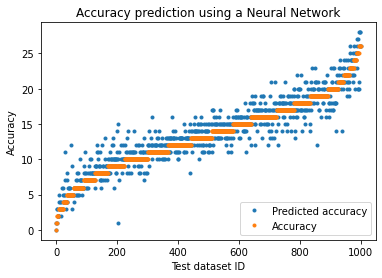

Error:  1.083


In [10]:
with torch.no_grad():
    deepset.eval()
    y_pred = torch.round(deepset(Y).cpu())
    
y_test = sum_Y.float().view(1000,1)
y_test = y_test
y_pred = np.array(y_pred)
y_test = np.array(y_test)
y_pred.shape, y_test.shape = (1000,),(1000,)
sort = np.argsort(y_test)
plt.xlabel("Test dataset ID")
plt.ylabel("Accuracy")
plt.title("Accuracy prediction using a Neural Network")
plt.plot(range(1000),y_pred[sort],'.',label='Predicted accuracy')
plt.plot(range(1000),y_test[sort],'.', label='Accuracy')
plt.legend(loc='lower right')
plt.show()    

print('Error: ',np.mean(np.abs(y_pred-y_test)))

In [ ]:
class Stat(nn.Module):
    def __init__(self, input_dim):
        super(Stat, self).__init__()
        self.input_dim = input_dim
        self.layer_1 = nn.Linear(input_dim,1000)
        self.layer_2 = nn.Linear(1000,1000)
        self.layer_3 = nn.Linear(1000,1)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_3(x))
        return x
    
x = torch.cat((torch.mean(X,1), torch.median(X,1).values, torch.std(X,1)), axis=1)
y = torch.cat((torch.mean(Y,1), torch.median(Y,1).values, torch.std(Y,1)), axis=1)

print(x.shape, y.shape)

model = Stat(784*3).cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())
num_epochs = 100
batch_size = 10000


total_loss = []
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        inputs = x[i:i+batch_size]
        outputs = model(inputs)
        targets = sum_X[i:i+batch_size]
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

torch.Size([1000, 2352])


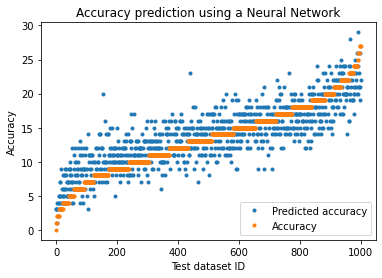

Error:  2.025


In [7]:
with torch.no_grad():
    model.eval()
    y_pred = torch.round(model(y).cpu())
    
y_test = sum_Y.float().view(1000,1)
y_test = y_test
y_pred = np.array(y_pred)
y_test = np.array(y_test)
y_pred.shape, y_test.shape = (1000,),(1000,)
sort = np.argsort(y_test)
plt.xlabel("Test dataset ID")
plt.ylabel("Accuracy")
plt.title("Accuracy prediction using a Neural Network")
plt.plot(range(1000),y_pred[sort],'.',label='Predicted accuracy')
plt.plot(range(1000),y_test[sort],'.', label='Accuracy')
plt.legend(loc='lower right')
plt.show()    

print('Error: ',np.mean(np.abs(y_pred-y_test)))

In [ ]:
class CS(nn.Module):
    def __init__(self, input_dim):
        super(CS, self).__init__()
        self.input_dim = input_dim
        self.layer_1 = nn.Linear(input_dim,1000)
        self.layer_2 = nn.Linear(1000,1000)
        self.layer_3 = nn.Linear(1000,1)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_3(x))
        return x
    
x = torch.cat((torch.mean(X,1), torch.median(X,1).values, torch.std(X,1)), axis=1)
y = torch.cat((torch.mean(Y,1), torch.median(Y,1).values, torch.std(Y,1)), axis=1)

print(x.shape, y.shape)

model = CS(784*3).cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())
num_epochs = 100
batch_size = 10000


total_loss = []
for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        inputs = x[i:i+batch_size]
        outputs = model(inputs)
        targets = sum_X[i:i+batch_size]
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()